<a href="https://colab.research.google.com/github/alfredoaguiararce/Clasificadores-de-imagenes/blob/main/Clasificador_de_Imagenes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Desarrollo de un clasificador de imagenes

Desarrolle un algoritmo de clasificacion de imagenes basado en el dataset, fashion_mist, utilizando una red neuronal.

<br>Hecho por Alfredo Aguiar Arce. 

**1.- Agregar las librerias que se utilizaran.**

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

**2.- Cargar el set de imagenes 'fashion_mist'**

In [3]:
fashion_mist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [16]:
#mostrar la estructura de esta data
total_train_images,h_train,w_train = train_images.shape
total_test_images,h_test,w_test = test_images.shape
print(f'Se tienen {total_train_images} imagenes de entranamiento en "train_images", cada imagen con un alto de {h_train} pixeles por {w_train} pixeles de ancho')
print(f'Se tienen {total_test_images} imagenes de entranamiento en "test_images", cada imagen con un alto de {h_test} pixeles por {w_test} pixeles de ancho')
print(f'Total de imagenes en el dataset "fashion_mist" : {total_train_images + total_test_images} imagenes')

Se tienen 60000 imagenes de entranamiento en "train_images", cada imagen con un alto de 28 pixeles por 28 pixeles de ancho
Se tienen 10000 imagenes de entranamiento en "test_images", cada imagen con un alto de 28 pixeles por 28 pixeles de ancho
Total de imagenes en el dataset "fashion_mist" : 70000 imagenes


**3.- Agregar las clases o categorias en las que se puede clasificar**

Son 10 categorias o clasificaciones en el dataset fashion_mist:
<br>

1. T-shirt/top
2. Trouser
3. Pullover
4. Dress
5. Coat
6. Sandal
7. Shirt
8. Sneaker
9. Bag
10. Ankle boot





In [5]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

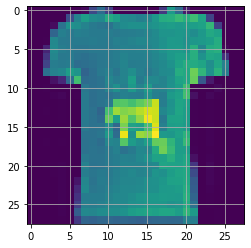

In [6]:
#Mostramos una imagen obtenida del set de datos con la libreria MatplotLib
plt.figure()
#Escogemos la imagen [180] de dataset, o mejor dicho del array de imagenes 'train_images'
plt.imshow(train_images[180])
plt.grid(True)

In [18]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**4.- Mostrar una cuadricula con informacion al respecto de las imagenes que se disponen.**

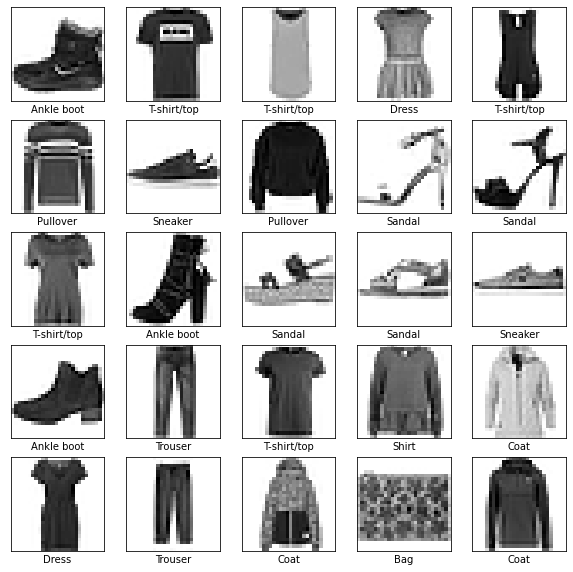

In [20]:
%matplotlib inline

#Configurar para mostrar imagenes de 10x10
plt.figure(figsize = (10,10))
#Mostrar 25 imagenes
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i],cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

**5.- Creamos nuestro modelo de inteligencia artificial.**

Para este caso se trata de una red neuronal de 3 capas 

1. La primera capa obtiene imagenes de 28x28 pixeles 

2. Se trabaja con 128 funciones de activacion usando como funcion de activacion relu. Esta capa trata de aproximar en un rango de 0 - 1 que tanto parecido tiene con las 10 categorias de salida en la capa siguiente.

3. La ultima capa usa softmax como funcion de activacion, divide en 10 categorias posibles como resultado de prediccion, softmax se encarga de volver 1 al valor mayor obtenido como resultado de las 128 funciones de activacion anteriores y 0 todos los demas valores.


In [22]:
#Modelo 3 capaz , red neuronal
model = keras.Sequential([keras.layers.Flatten(input_shape = (28,28)),
                          keras.layers.Dense(128,activation = tf.nn.relu),
                          keras.layers.Dense(10,activation = tf.nn.softmax)])

In [23]:
#optimizador tipo Adam
model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [24]:
#Se entrena el modelo con las imagenes y etiquetas de entrenamiento, se itera durante 5 epocas para mejorar la precision
model.fit(train_images,train_labels,epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6320 - accuracy: 0.7771
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3846 - accuracy: 0.8601
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3403 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3144 - accuracy: 0.8832
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2934 - accuracy: 0.8918


**6.- Test y evaluacion**

In [26]:
#Evaluamos las imagenes de test, con el modelo que ya hemos entrenado para verificar su eficiencia.
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Eficiencia del : {test_acc * 100} %')

313/313 [==============================] - 0s 1ms/step - loss: 0.3577 - accuracy: 0.8688
Eficiencia del : 86.87999844551086 %


In [27]:
#Prediciremos la etiqueta para cada una de las imagenes de test
predictions = model.predict(test_images)

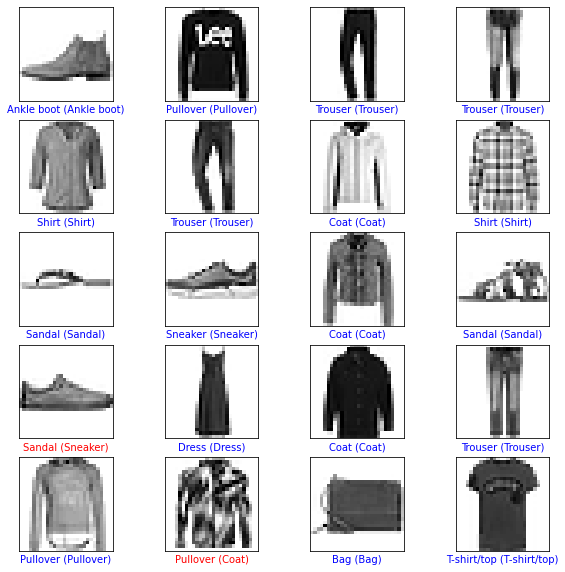

In [34]:
plt.figure(figsize = (10, 10))
#Se genera una cuadricula con las primeras 20 imagenes de test
for i in range(20):
  plt.subplot(5, 4, i + 1) # filas,columnas
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]

  #se muestra en rojo las predicciones en las que el algoritmo a fallado, y en azul aquellas en las que acerto
  if predicted_label == true_label:
    color = 'blue'
  else: 
    color = 'red'
    
  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)